In [180]:
from tensorflow import keras
from keras.models import *
from keras.layers import *
from keras import initializers
from keras.datasets import mnist
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras import backend as K
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

Loading and preprocessing the dataset.

In [236]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

X_test = X_test.reshape(10000, 784).astype('float32')[:60000]

X_train = X_train/255.0
X_test = X_test/255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [198]:
def get_activations(model, x, mode=0.0):
    outputs = [layer.output for layer in model.layers]
    activations = K.function([model.input], outputs)
    output_elts = activations([x])
    return output_elts

In [261]:
def makencompile_model(activation, input_dim, kernel_initializer):
  model_s = Sequential()

  stddev = 0.05

  model_s.add(Dense(100, input_dim=input_dim, activation=activation, kernel_initializer=kernel_initializer))
  model_s.add(Dense(100, activation=activation, kernel_initializer=kernel_initializer))
  model_s.add(Dense(100, activation=activation, kernel_initializer=kernel_initializer))
  model_s.add(Dense(100, activation=activation, kernel_initializer=kernel_initializer))
  model_s.add(Dense(100, activation=activation, kernel_initializer=kernel_initializer))

  model_s.add(Dense(units=y_train.shape[1], activation='softmax', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=stddev, seed=42)))

  model_s.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])

  return model_s

In [269]:
model_s = makencompile_model('sigmoid', 784, initializers.RandomNormal(mean=0.0, stddev=0.05, seed=42))
model_t = makencompile_model('tanh', 784, initializers.RandomNormal(mean=0.0, stddev=0.05, seed=42))

model_s_glorot = makencompile_model('sigmoid', 784, initializers.GlorotNormal(seed=42))
model_t_glorot = makencompile_model('tanh', 784, initializers.GlorotNormal(seed=42))

In [270]:
output_elts_s = get_activations(model_s, X_test, mode=0.0)
output_elts_t = get_activations(model_t, X_test, mode=0.0)

output_elts_s_glorot = get_activations(model_s_glorot, X_test, mode=0.0)
output_elts_t_glorot = get_activations(model_t_glorot, X_test, mode=0.0)

for i in range(len(output_elts_s)):
  output_elts_s[i] = output_elts_s[i].reshape(output_elts_s[i].shape[0]*output_elts_s[i].shape[1])

for i in range(len(output_elts_t)):
  output_elts_t[i] = output_elts_t[i].reshape(output_elts_t[i].shape[0]*output_elts_t[i].shape[1])

for i in range(len(output_elts_s)):
  output_elts_s_glorot[i] = output_elts_s_glorot[i].reshape(output_elts_s_glorot[i].shape[0]*output_elts_s_glorot[i].shape[1])

for i in range(len(output_elts_t)):
  output_elts_t_glorot[i] = output_elts_t_glorot[i].reshape(output_elts_t_glorot[i].shape[0]*output_elts_t_glorot[i].shape[1])

# 2.1 

Violin plots demonstrating vanishing gradients for sigmoid activation function.

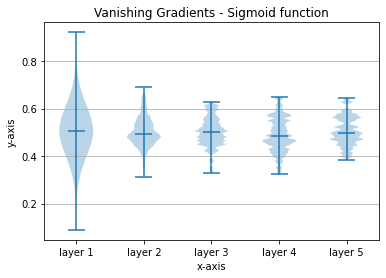

In [268]:
fig, ax = plt.subplots()
ax.violinplot(output_elts_s[:5], showmeans=False, showmedians=True)
ax.set_title('Vanishing Gradients - Sigmoid function')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
xticklabels = ['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5']
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels(xticklabels)
ax.yaxis.grid(True)
plt.show()

2.1 Violin plots demonstrating vanishing gradients problem fixed for sigmoid activation function using Glorot (Xavier) initialization.

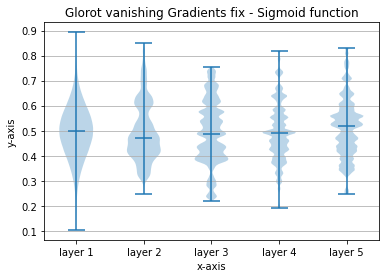

In [271]:
fig, ax = plt.subplots()
ax.violinplot(output_elts_s_glorot[:5], showmeans=False, showmedians=True)
ax.set_title('Glorot Vanishing Gradients fix - Sigmoid function')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
xticklabels = ['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5']
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels(xticklabels)
ax.yaxis.grid(True)
plt.show()

2.1 Violin plots demonstrating vanishing gradients for tanh activation function.

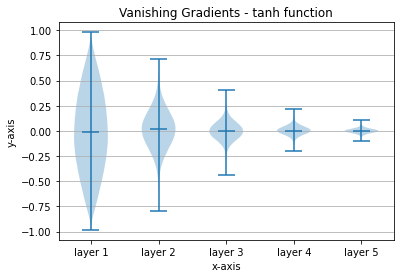

In [272]:
fig, ax = plt.subplots()
ax.violinplot(output_elts_t[:5], showmeans=False, showmedians=True)
ax.set_title('Vanishing Gradients - tanh function')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
xticklabels = ['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5']
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels(xticklabels)
ax.yaxis.grid(True)
plt.show()

2.1 Violin plots demonstrating vanishing gradients problem fixed for tanh activation function using Glorot (Xavier) initialization.

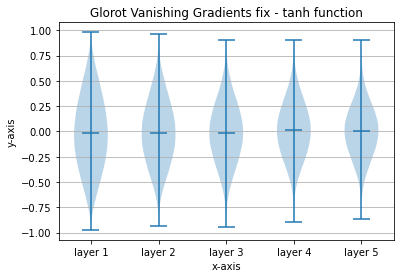

In [273]:
fig, ax = plt.subplots()
ax.violinplot(output_elts_t_glorot[:5], showmeans=False, showmedians=True)
ax.set_title('Glorot Vanishing Gradients fix - tanh function')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
xticklabels = ['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5']
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels(xticklabels)
ax.yaxis.grid(True)
plt.show()

In [274]:
model_r = makencompile_model('relu', 784, initializers.RandomNormal(mean=0.0, stddev=0.05, seed=42))
model_r_glorot = makencompile_model('relu', 784, initializers.GlorotNormal(seed=42))
model_r_He = makencompile_model('relu', 784, initializers.HeNormal(seed=42))

In [275]:
output_elts_r = get_activations(model_r, X_test, mode=0.0)
output_elts_r_glorot = get_activations(model_r_glorot, X_test, mode=0.0)
output_elts_r_He = get_activations(model_r_He, X_test, mode=0.0)

for i in range(len(output_elts_r)):
  output_elts_r[i] = output_elts_r[i].reshape(output_elts_r[i].shape[0]*output_elts_r[i].shape[1])

for i in range(len(output_elts_r)):
  output_elts_r_glorot[i] = output_elts_r_glorot[i].reshape(output_elts_r_glorot[i].shape[0]*output_elts_r_glorot[i].shape[1])

for i in range(len(output_elts_r)):
  output_elts_r_He[i] = output_elts_r_He[i].reshape(output_elts_r_He[i].shape[0]*output_elts_r_He[i].shape[1])

2.1 Violin plots demonstrating vanishing gradients for relu activation function.

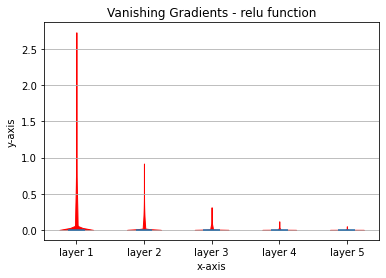

In [289]:
fig, ax = plt.subplots()
parts = ax.violinplot(output_elts_r[:5], showmeans=False, showmedians=True, showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('red')
    pc.set_alpha(1)

ax.set_title('Vanishing Gradients - relu function')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
xticklabels = ['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5']
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels(xticklabels)
ax.yaxis.grid(True)
plt.show()

2.1 Violin plots demonstrating vanishing gradients cannot be fixed for relu activation function using Glorot (Xavier) initialization.

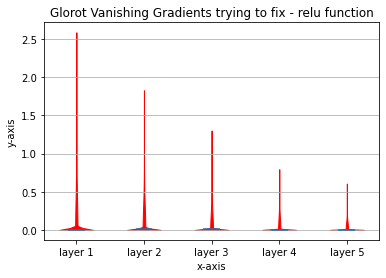

In [294]:
fig, ax = plt.subplots()
parts = ax.violinplot(output_elts_r_glorot[:5], showmeans=False, showmedians=True, showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('red')
    pc.set_alpha(1)

ax.set_title('Glorot Vanishing Gradients trying to fix - relu function')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
xticklabels = ['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5']
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels(xticklabels)
ax.yaxis.grid(True)
plt.show()

2.1 Violin plots demonstrating vanishing gradients problem fixed for relu activation function using He initialization.

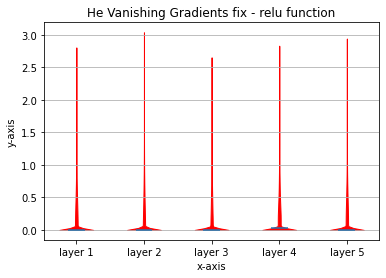

In [295]:
fig, ax = plt.subplots()
parts = ax.violinplot(output_elts_r_He[:5], showmeans=False, showmedians=True, showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('red')
    pc.set_alpha(1)

ax.set_title('He Vanishing Gradients fix - relu function')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
xticklabels = ['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5']
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels(xticklabels)
ax.yaxis.grid(True)
plt.show()

# 2.2 

The following code has been run on NYU HPC and results of the same are as follows.

Around 30.3% of simulations resulted in neural colapse.

(The output file for this code (q2p3.out) is attached in the same folder as this .ipynb file)

In [308]:
def makencompile_model2(depth, activation, input_dim):
  model = Sequential()

  for i in range(depth):
    model.add(Dense(2, input_dim=input_dim, activation=activation))

  model.add(Dense(units=y_train.shape[1], activation='relu'))
  model.compile(loss='mse', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])

  return model

In [ ]:
dead = 0

for i in range(1000):
  x = np.random.uniform(-np.sqrt(7),np.sqrt(7),3000)
  y = abs(x)
  model = makencompile_model2(10, 'relu', 1)
  history = model.fit(x, y, batch_size=64, epochs=10)
  if(history.history["loss"][-1] == history.history["loss"][0]):
    dead+=1

print(dead/1000)

# 2.3 

The following code has been run on NYU HPC and results of the same are as follows.

0% of simulations resulted in neural colapse. Thus, leaky ReLU activation did help prevent neural network colapse

(The output file for this code (q2p3.out) is attached in the same folder as this .ipynb file)

In [ ]:
dead = 0

activation = tf.keras.layers.LeakyReLU(alpha=0.01)

for i in range(1000):
  x = np.random.uniform(-np.sqrt(7),np.sqrt(7),3000)
  y = abs(x)
  model = makencompile_model2(10, activation, 1)
  history = model.fit(x, y, batch_size=64, epochs=10)
  if(history.history["loss"][-1] == history.history["loss"][0]):
    dead+=1

print(dead/1000)
